In [56]:
import pandas as pd
import numpy as np
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots
import squarify
##import arrow to work with days and to dehumanize expressions(like 'a year ago') on column "published_date"
import arrow

In [57]:
df=pd.read_csv('data/clean_data_set.csv')

In [58]:
df

,name,type_company,lat,lon,city,avg_stars_num,n_reviews_num,encoded_user,local_guide,clean_other_review_num,published_date,today_date,stars_num,review_EN,original_lang,number_of_reviews
0,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,Pp1)c,0.0,5.0,a year ago,2022-09-24,5.0,Best employer ever. Worked there for approxima...,ENG,19
1,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,*nk1l,0.0,2.0,a year ago,2022-09-24,5.0,better place with very good people everything ...,ENG,19
2,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,69lOZ,0.0,3.0,4 years ago,2022-09-24,5.0,Nice,ENG,19
3,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,&7jv4,0.0,27.0,3 months ago,2022-09-24,5.0,Good firm. The staff are very welcoming and f...,NOT_ENG,19
4,Dekkers Transport Holland,Trucking company,51.597249,5.027990,Tilburg,4.6,53.0,K2#6M,1.0,24.0,4 months ago,2022-09-24,5.0,"Top company, and coffee, so recommended\r\n\r\n",NOT_ENG,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,AMDIc,0.0,1.0,9 months ago,2022-09-24,1.0,"Untrustworthy people, they are good at lying....",NOT_ENG,6
3394,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,ivODx,0.0,2.0,a year ago,2022-09-24,1.0,Drives antisocial and overtakes right on the ...,NOT_ENG,6
3395,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,K1S^G,0.0,17.0,a year ago,2022-09-24,5.0,"In a word, toppers! Always think in possibili...",NOT_ENG,6
3396,L.H. Logistics,Trucking company,51.617957,4.736123,Breda,3.5,8.0,RP^Ug,1.0,101.0,a year ago,2022-09-24,5.0,First service\r\n\r\n,NOT_ENG,6


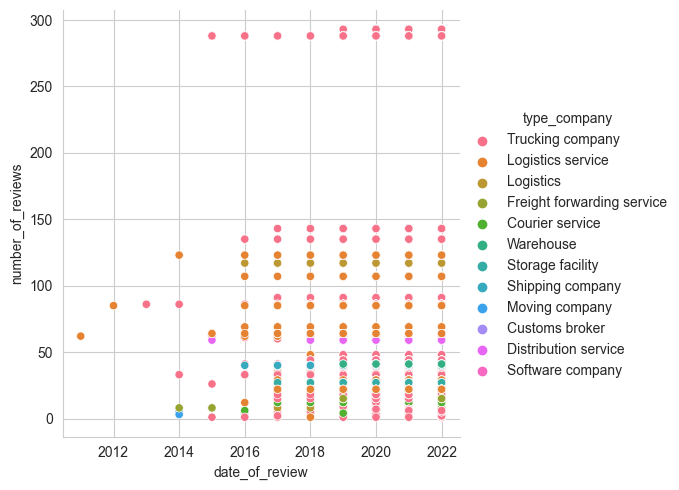

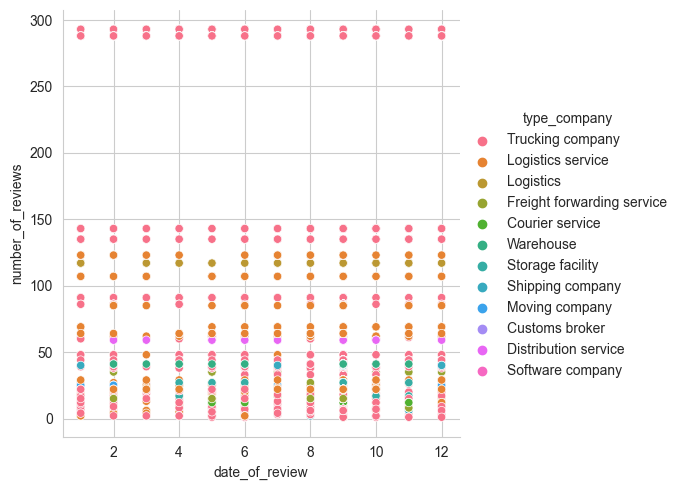

In [59]:

# Add a new nan values column named 'actual_date' so we can use it to fill in the actual date of every single "review", with in a loop
df['date_of_review']=np.nan
for i, pd in enumerate(df['published_date']):
    df.iloc[i,df.columns.get_loc('date_of_review')]=(arrow.get('2022-09-24').dehumanize(pd))#.format('YYYY-MM-DD')

def get_year(date):
    return date.format('YYYY')

def get_month(date):
    return date.format('MM')

def get_day(date):
    return date.format('DD')
df['year']=df['date_of_review'].apply(get_year).astype(int).sort_values()

sns.relplot(data=df,x=df['date_of_review'].apply(get_year).astype(int).sort_values(), y="number_of_reviews", hue= 'type_company')
sns.relplot(data=df,x=df['date_of_review'].apply(get_month).astype(int).sort_values(), y="number_of_reviews", hue= 'type_company')

Text(0.5, 1.0, 'Histogram of reviews vs year of review')

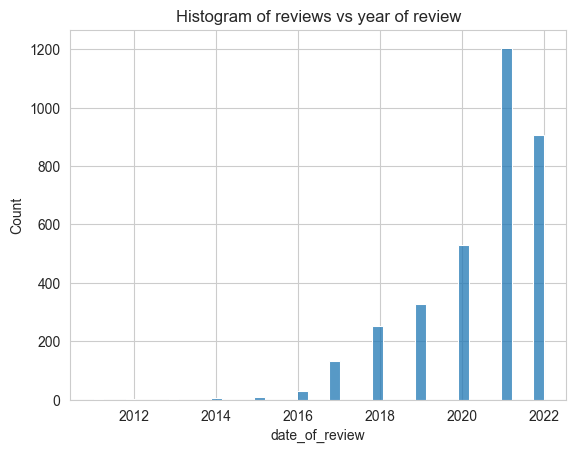

In [60]:
sns.histplot(df['date_of_review'].apply(get_year).astype(int).sort_values(), kde = False,).set_title("Histogram of reviews vs year of review")


Text(0.5, 1.0, 'Histogram of reviews vs month of review')

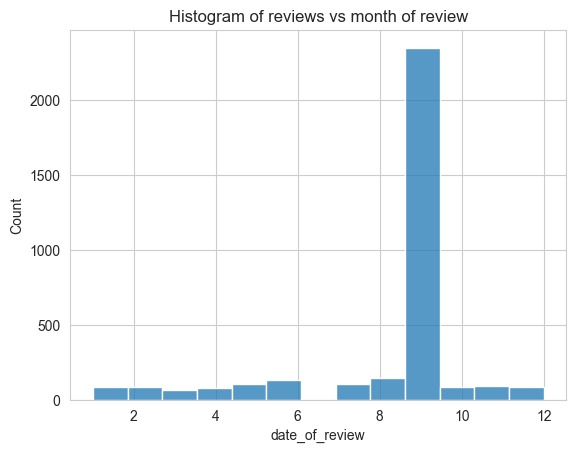

In [61]:
sns.histplot(df['date_of_review'].apply(get_month).astype(int).sort_values(), kde = False).set_title("Histogram of reviews vs month of review")


Text(0.5, 1.0, 'Histogram of reviews vs day of review')

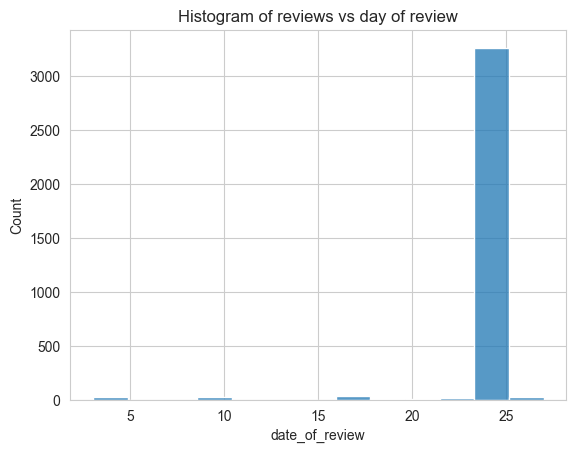

In [62]:
sns.histplot(df['date_of_review'].apply(get_day).astype(int).sort_values(), kde = False).set_title("Histogram of reviews vs day of review")


### Conclusions
<span style="font-size:20px;">We notice that the month of September has many reviews in relation to the rest of the months, this anomaly results from the method used to estimate the dates of reviews.
Dates were determined by reference to the date of data collection.
This is the main reason why September is repeated in our sample, the same anomaly is presented in greater extend when we try to determine the day the reviews were made, it turns out that most of them were made on the 24th of the month<span style="font-size:20px;">

Text(0.5, 1.0, 'number of companies in every city')

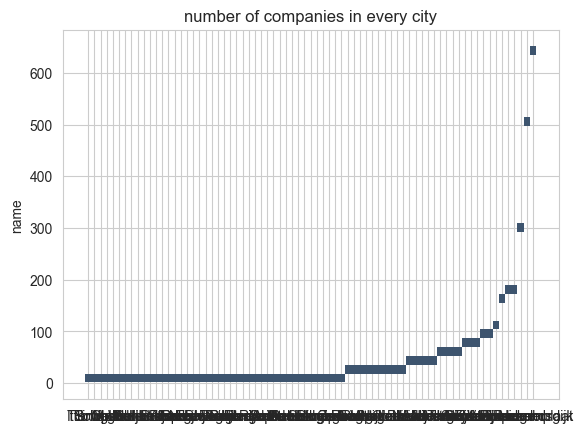

In [63]:
# cities vs number of companies
sns.histplot(x=df['city'].unique(),y=df.groupby('city')['name'].size().sort_values(),).set_title('number of companies in every city')


(0.0, 100.0, 0.0, 100.0)

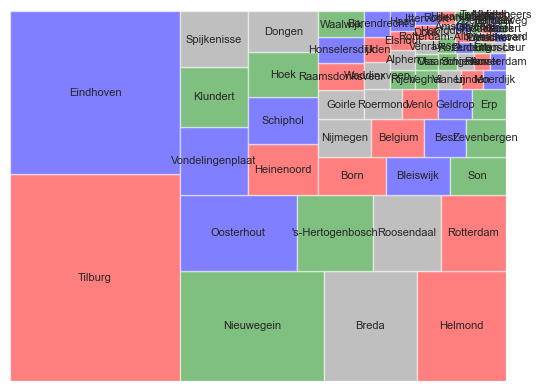

In [99]:
## Treemap with Squarify
##To use Squarify to create a Treemap, you will first do “pip install squarify”
cnt_city = df['city'].value_counts()
cnt_city = pd.DataFrame(cnt_city)
color=['red','blue','green','grey']
squarify.plot(sizes=cnt_city['city'], label=cnt_city.index, alpha=0.5, color = color ,text_kwargs={'fontsize':8})
plt.axis('off')


<AxesSubplot: title={'center': 'Distribution of logistic companies per city'}, xlabel='city', ylabel='Number of logistic companies'>

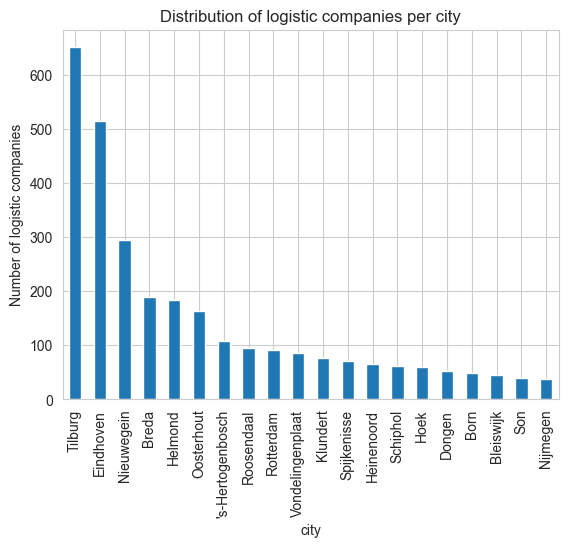

In [108]:
# the first 20 cities with the most companies vs number of companies for each city

logistics_by_City=df.groupby('city')['name'].size()

##len(cities)
top_20_cities=logistics_by_City.sort_values(ascending=False).head(n=20)
#top_20_cities.to_csv('data/top_20_cities.csv')

top_20_cities.plot(kind='bar',ylabel='Number of logistic companies',title='Distribution of logistic companies per city')

<AxesSubplot: title={'center': 'Number of reviews vs Average of stars'}, xlabel='number_of_reviews', ylabel='avg_stars_num'>

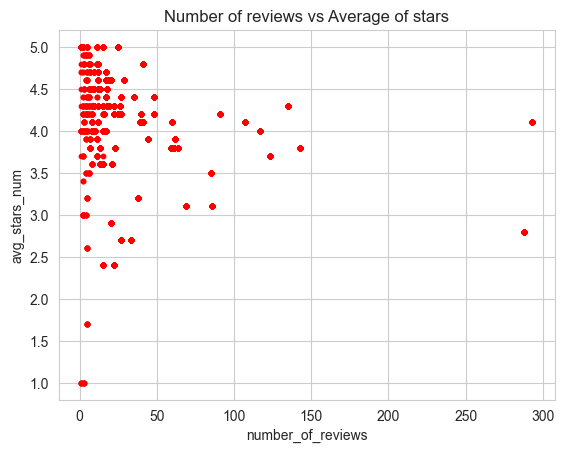

In [65]:
#2) scatter plot for number of reviews per company vs average of stars
df.plot.scatter(x='number_of_reviews',y='avg_stars_num',s=10,c='red',title='Number of reviews vs Average of stars')


<module 'matplotlib.pyplot' from 'C:\\Learn\\TOMlogistics\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

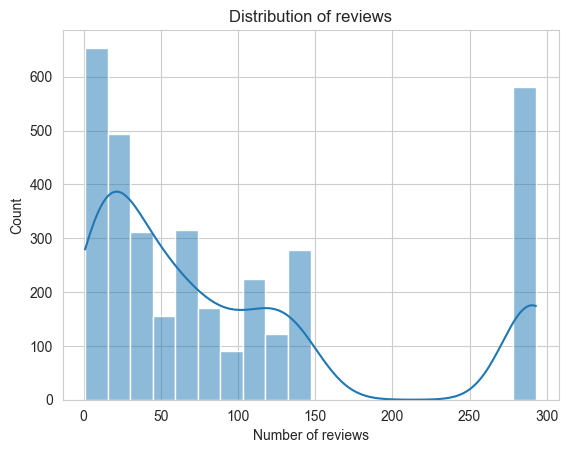

In [70]:
#distribution of number of reviews
sns.histplot(x=df['number_of_reviews'],kde=True).set(xlabel='Number of reviews',title='Distribution of reviews')
plt

Text(0.5, 1.0, 'Box of number of reviews ')

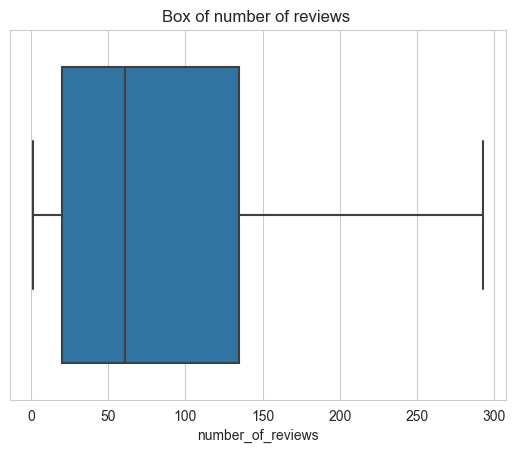

In [67]:
# Plot a boxplot of received stars
sns.boxplot(x=df['number_of_reviews']).set_title('Box of number of reviews ')


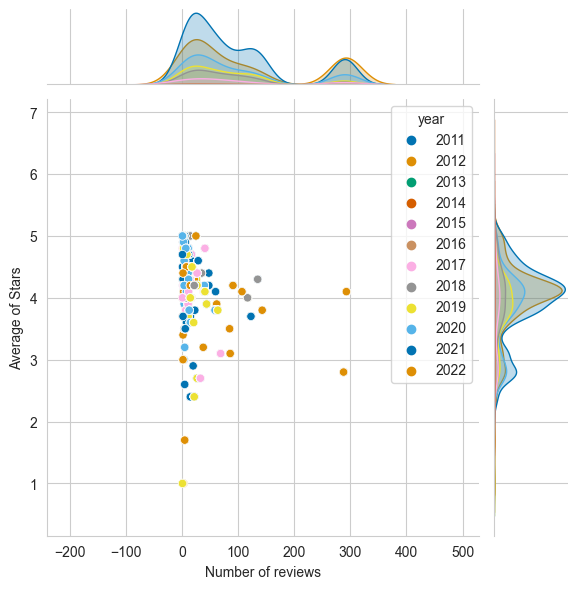

In [68]:
sns.jointplot(data=df, x="number_of_reviews", y="avg_stars_num", hue="year",palette='colorblind').set_axis_labels(xlabel='Number of reviews',ylabel='Average of Stars')

[Text(0.5, 0, 'Year of review'),
 Text(0, 0.5, 'Number of reviews'),
 Text(0.5, 1.0, 'Histogram of reviews vs year of review')]

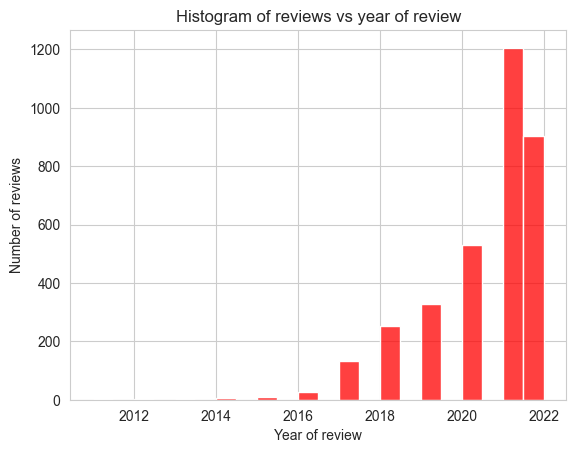

In [69]:

#Histogram of reviews vs year of review

#sns.histplot(df['year'].sort_values(), kde = False,).set_title("Histogram of reviews vs year of review")
sns.histplot(df['year'].sort_values(), kde = False,color='red',binwidth=0.5).set(xlabel='Year of review', ylabel='Number of reviews', title="Histogram of reviews vs year of review")